In [1]:
%pylab inline
import numpy as np
import pandas as pd
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


# PGA dataset

In [5]:
res = pd.read_csv("result_final.csv")
res

,URL,SIVA_FILENAMES,FILE_COUNT,LANGS,LANGS_BYTE_COUNT,LANGS_LINES_COUNT,LANGS_FILES_COUNT,COMMITS_COUNT,BRANCHES_COUNT,FORK_COUNT,EMPTY_LINES_COUNT,CODE_LINES_COUNT,COMMENT_LINES_COUNT,LICENSE
0,https://github.com/powmedia/buildify,4a14cc02da0a9280538cd3f3242365601d72f241.siva,12,"JSON,JavaScript,Markdown,Text","653,18611,4669,1094","29,849,216,22","1,5,1,4",38,25,0,"0,190,67,0","28,474,148,0","0,161,0,0","JSON:0.757,MIT:0.905,MIT-feh:0.479"
1,https://github.com/leon/play-salat,ee02fdfc0942ff17949f456d6ee3a27b976b7141.siva,53,"CSS,HTML,INI,Markdown,Scala,YAML","12981,692,38,12388,34281,132","114,30,4,343,1056,16","1,3,2,19,19,1",104,74,0,"0,4,0,79,156,4","113,25,0,248,766,11","0,0,0,0,102,0",NaN
2,https://github.com/adammark/Markup.js,00e71912d4ec215337d5d959a34ab0ce44fdd3b4.siva,22,"CSS,HTML,JSON,JavaScript,Markdown,Shell","6537,11414,678,182203,30807,91","83,492,30,5600,1204,5","1,2,1,13,1,1",295,30,0,"2,91,0,857,347,0","80,395,29,3726,857,0","0,4,0,1008,0,0",NaN
3,https://github.com/heroku/heroku-buildpack-scala,eb7aa1e50236c65bf44529ebb9a75fae68e1d6b0.siva,33,"JSON,Markdown,Ruby,Scala,Shell,Text,YAML","585,5528,6850,494,69595,1070,711","23,160,229,22,2425,10,32","1,2,5,2,18,1,2",560,206,0,"0,58,19,2,0,0,1","22,100,112,18,0,0,29","0,0,8,0,0,0,0","JSON:0.747,MIT:0.914"
4,https://github.com/brandonwamboldt/utilphp,"993cc5b5ca2603f06a82555df151fbb398114543.siva,...",12,"JSON,Markdown,PHP,XML,YAML","723,13409,157618,714,342","25,337,3986,26,23","1,5,3,1,1",267,112,0,"0,91,548,0,4","24,242,2505,0,18","0,0,930,0,0","JSON:0.667,MIT:0.817"
5,https://github.com/tias/xinput_calibrator,ecb5809790cb86afa70e958bf19d2b968a8981c7.siva,41,"C++,M4Sugar,Makefile,Roff,SVG,Shell,Text,XPM,d...","131506,3532,5289,3856,59761,3632,1676,5956,300","3729,104,145,121,1374,120,42,268,12","22,1,6,1,1,3,1,1,1",201,72,0,"407,0,14,0,0,0,0,0,0","1945,0,48,0,0,0,0,0,0","575,0,77,0,0,0,0,0,0",NaN
6,https://github.com/substack/node-mkdirp,284bc24eaafca75786c7e86f1da66ad61adacdb7.siva,23,"JSON,JavaScript,Markdown,Text,YAML","556,16978,2095,1456,132","28,614,101,35,11","1,18,1,2,1",82,158,0,"0,75,37,0,0","27,470,63,0,10","0,18,0,0,0","JSON:0.591,MIT:0.735"
7,https://github.com/CakeDC/recaptcha,f4c4682073fcc4c67b38583594d73a880d648934.siva,24,"Gettext Catalog,JSON,Markdown,PHP,Text,YAML","9900,741,5861,25408,1243,936","246,28,178,1006,24,46","6,1,6,8,1,1",114,53,0,"0,0,54,123,0,7","0,27,120,397,0,38","0,0,0,479,0,0",MIT:0.773
8,https://github.com/luislavena/rake-compiler,28e938cf837c6859197000cc647f84f92668f0b6.siva,46,"Gherkin,RDoc,Ruby,Text,YAML","10680,15682,87905,14012,802","258,439,2783,433,43","8,1,30,2,3",432,116,1,"29,0,467,0,1","221,0,1970,0,39","0,0,241,0,0","JSON:0.769,MIT:0.911,MIT-feh:0.497"
9,https://github.com/be9/acl9,b54c2cb6363f42394b25028d3dbde6930ad8c7ed.siva,130,"Markdown,Ruby,Text,YAML","16487,115102,1072,1524","487,4216,10,73","3,113,1,3",192,81,0,"147,735,0,7","337,2734,0,34","0,440,0,29","JSON:0.780,MIT:0.942"


In [8]:
print("Number of rows/repositories :", len(res))

siva_files = set()
for row_siva in res["SIVA_FILENAMES"]:
    try:
        siva_files.update(row_siva.split(","))
    except AttributeError: 
        continue
        
print("Number of siva files :", len(siva_files))

Number of rows/repositories : 182014
Number of siva files : 248043


# Number of forks

In [9]:
total_fork_count = res["FORK_COUNT"].sum()
print("Number of forks :", total_fork_count)

Number of forks : 59246


# Number of languages

In [40]:
langs = set()
for row_langs in res["LANGS"]:
    try:
        langs.update(row_langs.split(","))
    except AttributeError: 
        continue
print("Number of languages :", len(langs))

Number of languages : 455


# Quantity per language

In [10]:
langs_bytes = defaultdict(int)
langs_lines = defaultdict(int)
langs_files = defaultdict(int)

for i in range(len(res)):
    row = res.iloc[i]
    try:
        langs = row.LANGS.split(",")
        langs_bytes_count = row.LANGS_BYTE_COUNT.split(",")
        langs_lines_count = row.LANGS_LINES_COUNT.split(",")
        langs_files_count = row.LANGS_FILES_COUNT.split(",")

        for l in langs:
            langs_bytes[l] += int(langs_bytes_count[langs.index(l)])
            langs_lines[l] += int(langs_lines_count[langs.index(l)])
            langs_files[l] += int(langs_files_count[langs.index(l)])
    except AttributeError: 
        continue

In [11]:
langs_files

defaultdict(int,
            {'1C Enterprise': 2992,
             'ABAP': 539,
             'ABNF': 49,
             'AGS Script': 837,
             'AMPL': 692,
             'ANTLR': 803,
             'API Blueprint': 503,
             'APL': 374,
             'ASN.1': 3551,
             'ASP': 21783,
             'ATS': 3010,
             'ActionScript': 83504,
             'Ada': 20865,
             'Adobe Font Metrics': 2017,
             'Agda': 4708,
             'Alloy': 23,
             'Alpine Abuild': 4940,
             'Ant Build System': 16314,
             'ApacheConf': 8694,
             'Apex': 4183,
             'Apollo Guidance Computer': 3172,
             'AppleScript': 1573,
             'Arc': 210,
             'Arduino': 15531,
             'AsciiDoc': 35009,
             'AspectJ': 5007,
             'Assembly': 72700,
             'Augeas': 1093,
             'AutoHotkey': 6224,
             'AutoIt': 834,
             'Awk': 5233,
             'Ballerina': 571,

In [12]:
results = []
for lang, _ in langs_files.items():
    results.append((lang, langs_files[lang], langs_lines[lang], langs_bytes[lang]))
results

[('JSON', 2162977, 803822559, 69766435359),
 ('JavaScript', 5646092, 1880501462, 90695294715),
 ('Markdown', 1909045, 246884912, 10964388083),
 ('Text', 1996067, 1488675189, 57327600043),
 ('CSS', 630309, 221639211, 10009626571),
 ('HTML', 2521375, 590586404, 33904172085),
 ('INI', 390162, 27116506, 1296572847),
 ('Scala', 246700, 26478221, 964267204),
 ('YAML', 499916, 107465965, 4171150124),
 ('Shell', 618496, 150419813, 4716299253),
 ('Ruby', 928826, 83603889, 2687916843),
 ('PHP', 2077512, 330805884, 11374647733),
 ('XML', 2811770, 891570643, 46958631568),
 ('C++', 4281369, 1242824287, 44632927810),
 ('M4Sugar', 48616, 29279153, 1020335347),
 ('Makefile', 594476, 52598433, 1926524892),
 ('Roff', 187093, 66349445, 2202757936),
 ('SVG', 2215934, 207321537, 20389609258),
 ('XPM', 21674, 3471097, 192380499),
 ('desktop', 9128, 229520, 7978651),
 ('Gettext Catalog', 158254, 213856847, 6296750576),
 ('Gherkin', 22122, 1379975, 53628967),
 ('RDoc', 3457, 587943, 20429592),
 ('HTML+ERB', 8

In [13]:
df_langs = pd.DataFrame(results, columns=["LANGS", "FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"])
df_langs

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
0,JSON,2162977,803822559,69766435359
1,JavaScript,5646092,1880501462,90695294715
2,Markdown,1909045,246884912,10964388083
3,Text,1996067,1488675189,57327600043
4,CSS,630309,221639211,10009626571
5,HTML,2521375,590586404,33904172085
6,INI,390162,27116506,1296572847
7,Scala,246700,26478221,964267204
8,YAML,499916,107465965,4171150124
9,Shell,618496,150419813,4716299253


In [14]:
print("Total number of files :", df_langs["FILE_COUNT"].sum())
print("Total number of lines :", df_langs["LINE_COUNT"].sum())
print("Total number of bytes :", df_langs["BYTE_COUNT"].sum())

Total number of files : 54525584
Total number of lines : 15941318379
Total number of bytes : 710370897224


In [15]:
top10 = df_langs.sort_values("FILE_COUNT", ascending=False).head(10)
top10

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
26,C,5858304,2604668203,84782142152
1,JavaScript,5646092,1880501462,90695294715
13,C++,4281369,1242824287,44632927810
32,Java,4150873,648414582,23050951800
12,XML,2811770,891570643,46958631568
5,HTML,2521375,590586404,33904172085
17,SVG,2215934,207321537,20389609258
0,JSON,2162977,803822559,69766435359
11,PHP,2077512,330805884,11374647733
27,Go,2025439,780429460,26346073405


### Normalization

In [16]:
values_type = ["FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"]
for val_type in values_type:
    top10[val_type] /= top10[val_type].max()
top10

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
26,C,1.000000,1.000000,0.934802
1,JavaScript,0.963776,0.721974,1.000000
13,C++,0.730821,0.477153,0.492120
32,Java,0.708545,0.248943,0.254158
12,XML,0.479963,0.342297,0.517763
5,HTML,0.430393,0.226742,0.373825
17,SVG,0.378255,0.079596,0.224814
0,JSON,0.369216,0.308608,0.769240
11,PHP,0.354627,0.127005,0.125416
27,Go,0.345738,0.299627,0.290490


### Visualization

In [21]:
langs = list(top10["LANGS"])
langs

['C', 'JavaScript', 'C++', 'Java', 'XML', 'HTML', 'SVG', 'JSON', 'PHP', 'Go']

In [22]:
values = [[] for _ in range(len(values_type))]
for i in range(len(langs)):
    for j, val_type in enumerate(values_type):
        values[j].append(top10.iloc[i][val_type])

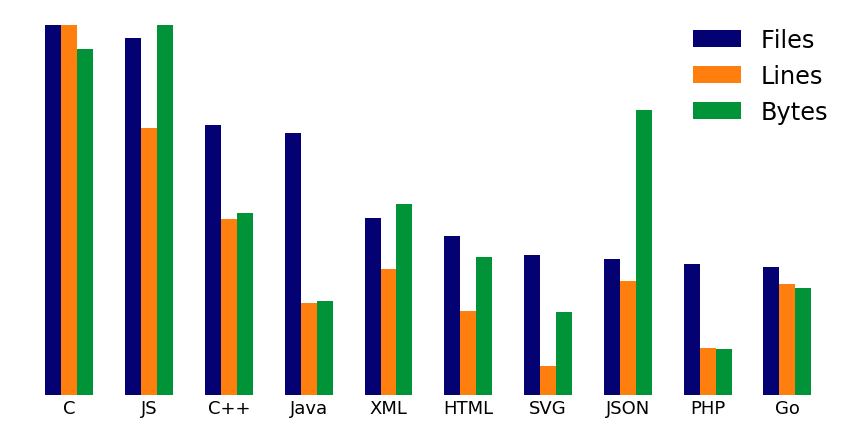

In [23]:
figure(figsize=(12, 6))
ax = subplot(111)

x = arange(1, 11)
ax.bar(x-0.2, values[0], width=0.2, align='center', color="#040273", label="Files")
ax.bar(x, values[1], width=0.2, align='center', color="#ff7f0e", label="Lines")
ax.bar(x+0.2, values[2], width=0.2, align='center', color="#009337", label="Bytes")

ax.set_xticks(x)
langs[1] = "JS"
ax.set_xticklabels(langs, fontsize=18)
ax.tick_params(axis='both', which='both',length=0)
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

legend(fontsize=24).get_frame().set_linewidth(0.0)
tight_layout()
savefig("lang_stats_final.eps")